Determining the Current Rank of Tennis Players

Introduction:

Global player rankings provide interesting and valuable insights into professional tennis performances. Players earn points based on their top 18 performances of the past 52 weeks at events hosted by one of the major governing bodies of the sport. Top performers earn significant prize money at major tournaments.

In our project, we will attempt to determine the current rank of professional tennis players based on factors such as best rank achieved throughout their career, total prize money earned, age, and seasons played at the professional level. This provides an interesting sports analytics question, and the results could potentially help in predicting future player rankings, which has economic and entertainment value.

The dataset we will use is “Player Stats for Top 500 Players'' from ultimatetennisstatistics.com. This dataset compiles individual player data for the 500 highest ranked professional tennis players, including a variety of different categories.


In [22]:
library(tidyverse)
library(dbplyr)
library(DBI)
library(repr)

# Preliminary Data Analysis

In [2]:
player_stat = read_csv("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS")

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
# Clean data
colnames(player_stat) = gsub(" ", "_", colnames(player_stat))

# player_star: raw
# player_clean: cleaned Age, Current_Rank, Best_Rank, Seasons, Prize_Money
# player_select: selected Name, Age, Current_Rank, Best_Rank, Prize_Money
player_clean <- player_stat |>
separate(col = Age, into = c("Age", "DateOfBirth"), sep = " ", convert = TRUE) |>
separate(col = Current_Rank, into = c("Current_Rank", "Points"), sep = " ", convert = TRUE) |>
separate(col = Best_Rank, into = c("Best_Rank", "Date_Of_Best_Rank"), sep = " ", convert = TRUE)
# arrange(Current_Rank)

player_clean$Seasons <- as.numeric(player_stat$Seasons)
player_clean$Prize_Money <- gsub("\\D+", "", as.character(player_clean$Prize_Money))
player_clean$Prize_Money <- as.numeric(player_clean$Prize_Money)

player_data <- select(player_clean, Name, Age, Seasons, Current_Rank, Best_Rank, Prize_Money)

head(player_data)

Name,Age,Seasons,Current_Rank,Best_Rank,Prize_Money
<chr>,<int>,<dbl>,<int>,<int>,<dbl>
Oscar Jose Gutierrez,26,NA,378,363,NA
Jack Draper,18,NA,326,316,59040
Lukas Lacko,32,14,178,44,3261567
Duck Hee Lee,21,2,236,130,374093
Bernard Tomic,27,11,183,17,6091971
Hubert Hurkacz,22,5,31,31,1517157


In [44]:
# Getting values for predictor variable table

# Age values
age_mean <- mean(player_data$Age, na.rm = TRUE)
age_missing <- sum(is.na(player_data$Age))

# Seasons values
seasons_mean <- mean(player_data$Seasons, na.rm = TRUE)
seasons_missing <- sum(is.na(player_data$Seasons))

# Best Rank values
best_rank_mean <- mean(player_data$Best_Rank, na.rm = TRUE)
best_rank_missing <- sum(is.na(player_data$Best_Rank))

# Prize money values
prize_money_mean <- mean(player_data$Prize_Money, na.rm = TRUE)
prize_money_missing <- sum(is.na(player_data$Prize_Money))

total_row <- nrow(player_data)

Table 1: Predictor variable characteristics determined using training data
| PREDICTOR VARIABLE | AGE   | SEASONS | BEST RANK | PRIZE MONEY |
|--------------------|-------|---------|-----------|-------------|
| MEAN               | 25.97 | 6.49    | 178.2     | 210         |
| NUMBER OF ROWS     | 500   | 500     | 500       | 500         |
| MISSING ROWS       | 1     | 126     | 1         | 81          |

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


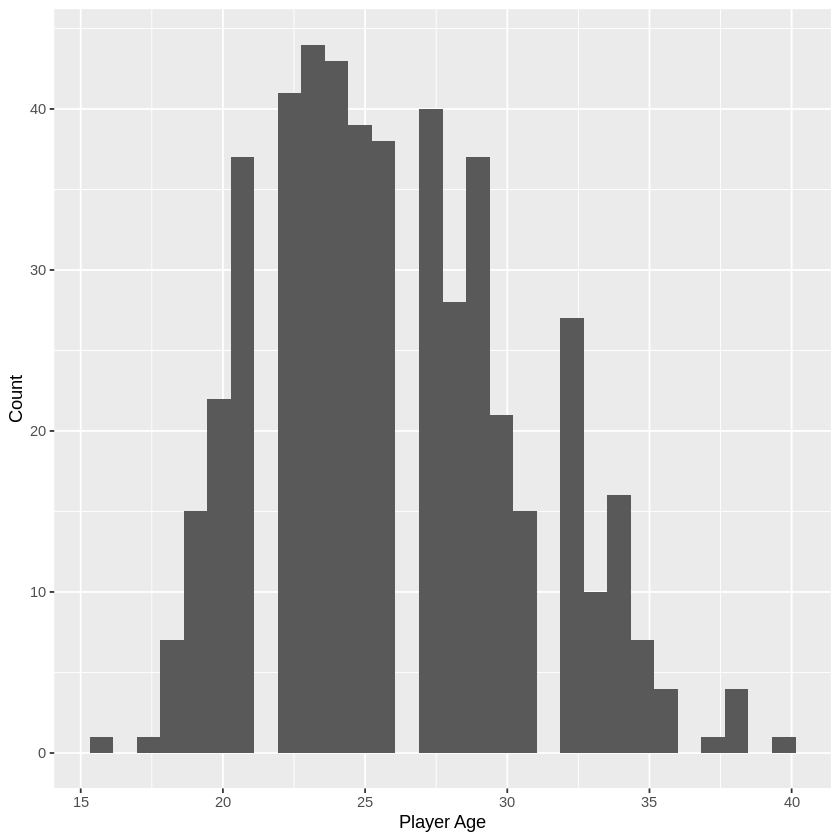

In [19]:
age_dist <- player_data |>
    ggplot(aes(x = Age)) +
    geom_histogram() +
    xlab("Player Age") +
    ylab("Count")

age_dist

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


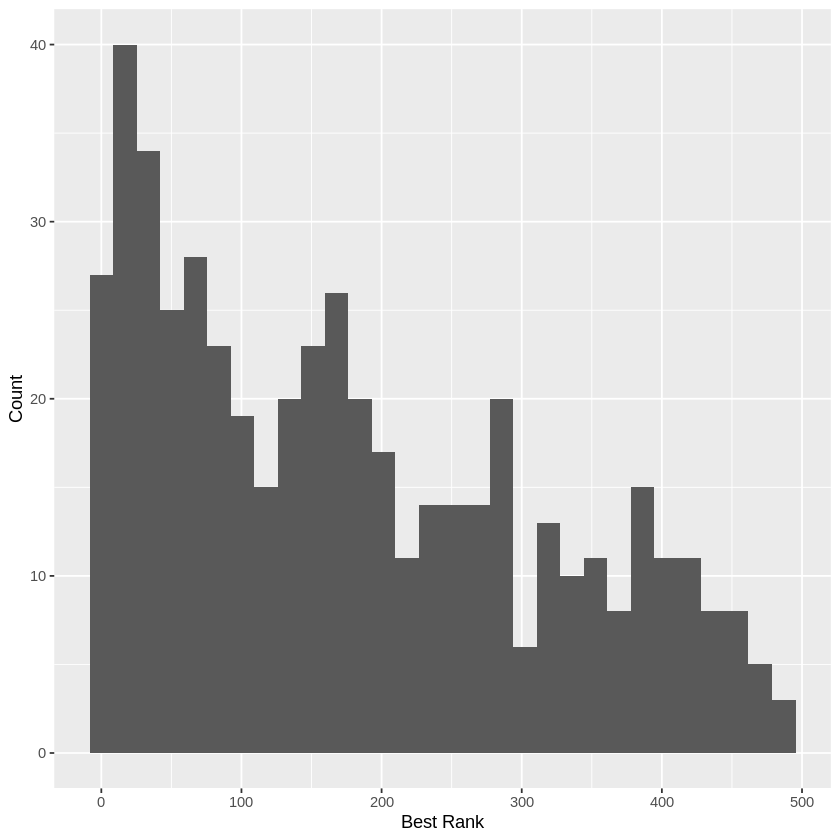

In [18]:
best_dist <- player_data |>
    ggplot(aes(x = Best_Rank)) +
    geom_histogram() +
    xlab("Best Rank") +
    ylab("Count")

best_dist

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 126 rows containing non-finite values (stat_bin).”


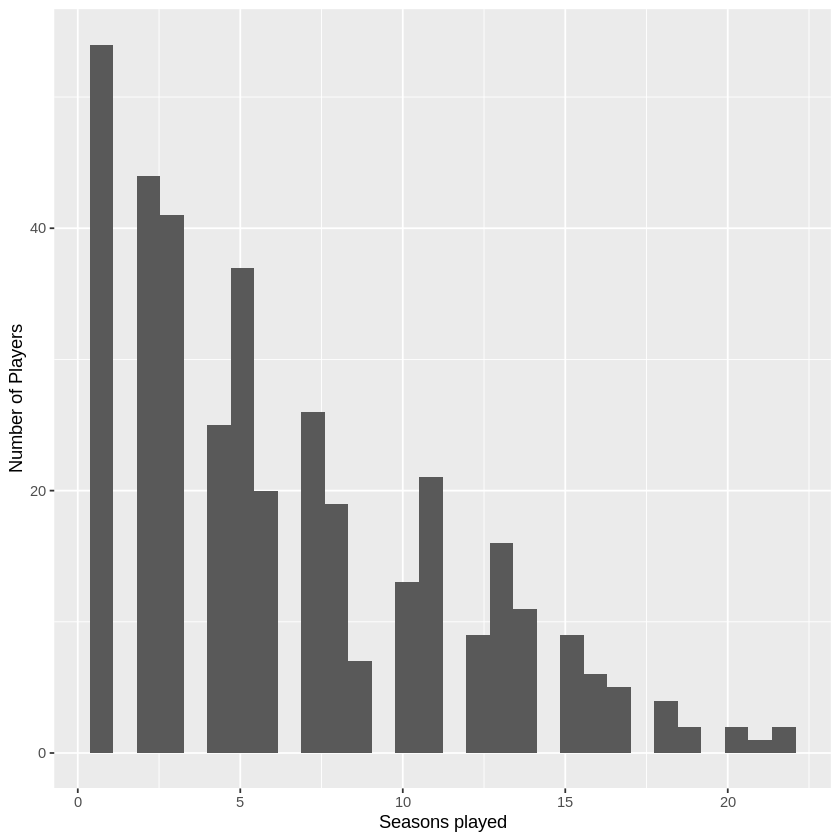

In [17]:
seasons_dist <- player_data |>
    ggplot(aes(x = Seasons)) +
    geom_histogram() +
    xlab("Seasons played") +
    ylab("Number of Players")

seasons_dist

# Methods

Data analysis will be conducted through regression and visualization. The “best rank”, “age”, “seasons” and “prize money earned” variables will be utilized to determine the current rank of the top 500 tennis players. As the current rank of a player is a numeric value, the K-nearest neighbors regression method will be used in the analysis. To perform the regression method, we will split our wrangled data into two sets, a training set and a testing set. The training set will build our model, while the testing set will evaluate the accuracy of our model. During its production, we will tune the value of K to optimize the accuracy of its predictions. Finally, when our model has been built, we can evaluate it using our testing dataset. At this point, we can use the model to predict the current rank of tennis players.

To visualize the training data, a number of scatter plots will be created with the best rank of a player on the y-axis and the predictor variable on the x-axis. Through these visualizations, conclusions regarding the relationship between each predictor variable and current rank will be determined.

Expected outcomes and significance:
We expect that a regression analysis using the best rank, age, seasons played, and prize money earned will be able to predict the current rank of a given player. A direct impact that our findings will have is creating an understanding of how each predictor variable impacts the current ranking of a player. By addressing this knowledge deficit, we can establish a platform for future tennis related inquiries. Questions such as: predicting the future rankings, forecasting the future elo ratings and determining relationships between age and ranking can be answered using a process similar to what we are employing. Additionally, our model can be adapted to predict future outstanding players using data from their current league. The knowledge gained through this analysis will broaden the application of statistical analysis in the world of tennis.
